In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Datasets/train.csv")

1.1. Finding number of exact duplicates ::

---



The duplicated() method checks for exact duplicates in the DataFrame.

By default, it marks all duplicates as True except for the first occurrence. You can change this behavior using the keep parameter.
The resulting DataFrame exact_duplicates contains the rows that are exact duplicates of other rows in the original DataFrame.

Here we remove the exact duplicates, as the first step of our data cleaning

In [ ]:
#Find number of exact duplicates

exact_duplicates = df[df.duplicated(keep='first')]
print("Number of duplicates = ",len(exact_duplicates))

Number of duplicates =  273


In [ ]:
#Remove exact duplicates

print("Number of rows before duplicate deletion = ",len(df))
df = df.drop_duplicates(keep="first")
print("Number of rows after duplicate deletion = ",len(df))

Number of rows before duplicate deletion =  60000
Number of rows after duplicate deletion =  59727



 1.2. Removing "elevation" column ::

---



 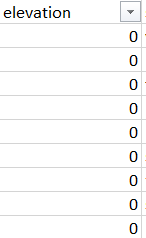


---


 We observe that all values under "elevation" column are zero. This is not adding any useful information to our dataset. So we remove this column.


In [ ]:
#Removing elevation attribute, since all values are 0.

print("Number of columns BEFORE elevation column deletion = ",df.shape[1])
df = df.drop("elevation", axis=1)
print("Number of columns AFTER elevation column deletion = ",df.shape[1])


Number of columns BEFORE elevation column deletion =  16
Number of columns AFTER elevation column deletion =  15


1.3. Normalizing data ::


---

We observe that the values are not uniform under all columns. Eg. Upper case and lower case for same values at different places.
Hence we convert all values of the dataframe into lower case.

In [ ]:
#Converting upper case to lower case for all values in the dataframe, for uniformity

df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.head(20)


1.4. Normalize "flat_type" column ::


---

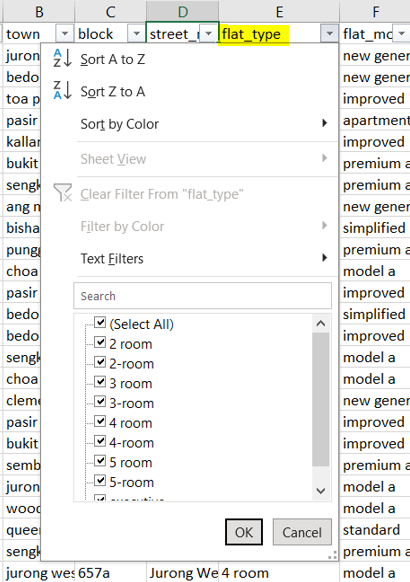

We observe that the data under "flat_type" is not uniform. Eg `3-room` and `3 room`. So we remove the string `room` and keep only the numerical part before it.

In [ ]:
#Observe rows to see the values under "furnished" column

df['flat_type']=df['flat_type'].str[0]
df.head(20)

1.5. Removing "furnished" column ::


---

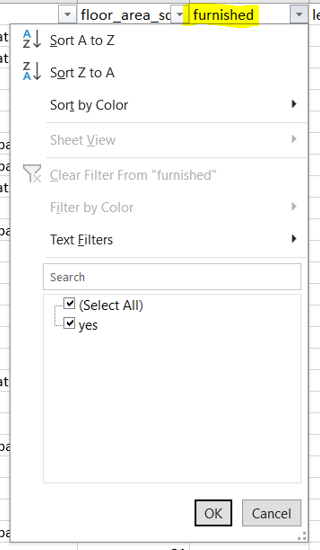

---



We see that all values under "furnished" column are "Yes". This is data redundancy. We remove this column to improve our dataset.

In [ ]:
#All flats are furnished.So we remove the column "furnished"

print("Number of columns BEFORE furnished column deletion = ",df.shape[1])
df = df.drop("furnished", axis=1)
print("Number of columns AFTER furnished column deletion = ",df.shape[1])

Number of columns BEFORE furnished column deletion =  15
Number of columns AFTER furnished column deletion =  14


1.6. Removing "planning_area" column ::

---

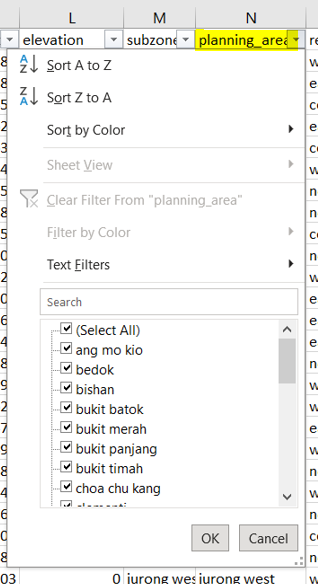


---


We see that values under "planning_area" are usually the same as the values under the corresponding "town". There are about 2 percent of the records which have a value under "planning_area" thta is different from the value under "town". Hence we remove this column.

In [ ]:
#Count number of rows which have "planning_area" as a subset of "town"

count=0
for row in df.itertuples():
  if(row.planning_area in row.town):
    count+=1
print("number of rows which have `planning_area` as a subset of `town` = ",count)

number of rows which have `planning_area` as a subset of `town` =  58545


In [ ]:
#Remove planning_area column

print("Number of columns BEFORE planning_area column deletion = ",df.shape[1])
df = df.drop("planning_area", axis=1)
print("Number of columns AFTER planning_area column deletion = ",df.shape[1])

Number of columns BEFORE planning_area column deletion =  14
Number of columns AFTER planning_area column deletion =  13
